# Entity Evaluation

- compute overlapping score
- compute confusion matrix
- plot confusion matrix

## 1. Prepare annotated utterances for testing

In [1]:
annotated_utterances = [
    "I like to drink <drink>coffee</drink>.",
    "<name>Hana</name> thinks that watching TV is a boring activity.",
    "It is interesting to follow the Tweet of President <name>Trump</name>.",
    "<drink>Chocolate</drink> is <name>Alvin</name>'s favorite.",
    "Hello World",
]

## 2. Extract true labels from annotated utterances

In [2]:
from ynlu.sdk.evaluation.utils import preprocess_annotated_utterance
entity_labels = []
for i, annotated_utterance in enumerate(annotated_utterances):
    entity_label = preprocess_annotated_utterance(annotated_utterance)
    entity_labels.append(entity_label)
    print("#{}: \n {} \n {}\n".format(i, annotated_utterance, entity_label))

#0: 
 I like to drink <drink>coffee</drink>. 
 ['DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'drink', 'drink', 'drink', 'drink', 'drink', 'drink', 'DONT_CARE']

#1: 
 <name>Hana</name> thinks that watching TV is a boring activity. 
 ['name', 'name', 'name', 'name', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE', 'DONT_CARE',

## 3. Remove annotations

In [3]:
from ynlu.sdk.evaluation.utils import remove_annotation
clean_utterances = []
for i, annotated_utterance in enumerate(annotated_utterances):
    clean_utterance = remove_annotation(annotated_utterance)
    clean_utterances.append(clean_utterance)
    print("#{}: \n {} \n {}\n".format(i, annotated_utterance, clean_utterance))

#0: 
 I like to drink <drink>coffee</drink>. 
 I like to drink coffee.

#1: 
 <name>Hana</name> thinks that watching TV is a boring activity. 
 Hana thinks that watching TV is a boring activity.

#2: 
 It is interesting to follow the Tweet of President <name>Trump</name>. 
 It is interesting to follow the Tweet of President Trump.

#3: 
 <drink>Chocolate</drink> is <name>Alvin</name>'s favorite. 
 Chocolate is Alvin's favorite.

#4: 
 Hello World 
 Hello World



## 4. Summon your model and Obtain predictions

In [4]:
# from ynlu import NLUClient
# client = NLUClient(token="YOUR_TOKEN_HERE")

# # Summon your model
# model = client.get_model_by_id("MODEL_ID")

# # Predict
# predictions = []
# for utt in utterances:
#     _, entity_prediction = model.predict(utt)
#     predictions.append(entity_prediction)

In [5]:
## Suppose the predictions you obtain are:
predictions = [
    [
        {"entity": "name", "value": "I", "score": 0.7},
        {"entity": "DONT_CARE", "value": " like to drink", "score": 0.5},
        {"entity": "drink", "value": " coffee.", "score": 0.8}
    ],
    [
        {"entity": "name", "value": "Hana", "score": 0.9},
        {"entity": "DONT_CARE", "value": " thinks that ", "score": 0.8},
        {"entity": "drink", "value": "watching TV ", "score": 0.4},
        {"entity": "DONT_CARE", "value": "is a boring activity.", "score": 0.7},
    ],    
    [
        {"entity": "DONT_CARE", "value": "It is interesting to follow the", "score": 0.8},
        {"entity": "name", "value": "Tweet", "score": 0.9},
        {"entity": "DONT_CARE", "value": " of", "score": 0.888},
        {"entity": "name", "value": " President Trump", "score": 0.7},
        {"entity": "drink", "value": ".", "score": 0.222},
    ],
    [
        {"entity": "name", "value": "Chocolate", "score": 0.8},
        {"entity": "DONT_CARE", "value": " is ", "score": 0.8},
        {"entity": "name", "value": "Alvin's", "score": 0.9},
        {"entity": "DONT_CARE", "value": " favorite.", "score": 0.8},
    ],
    [
        {"entity": "name", "value": "Hello", "score": 0.9},
        {"entity": "DONT_CARE", "value": " ", "score": 0.8},
        {"entity": "drink", "value": "World", "score": 0.4},
    ],
]

## 5. Evaluate your model by computing different metrics

### (1) overlapping score

In [6]:
# overlapping_score of each instance
from ynlu.sdk.evaluation import single__entity_overlapping_score

for i, (clean_utt, pred, label) in enumerate(zip(clean_utterances, predictions, entity_labels)):
    overlapping_score = single__entity_overlapping_score(
        utterance=clean_utt,
        entity_prediction=pred,
        y_true=label,
    )
    print("#{}: {}\n overlapping score= {}\n".format(i, clean_utt, overlapping_score))

#0: I like to drink coffee.
 overlapping score= 0.8695652173913043

#1: Hana thinks that watching TV is a boring activity.
 overlapping score= 0.76

#2: It is interesting to follow the Tweet of President Trump.
 overlapping score= 0.7017543859649122

#3: Chocolate is Alvin's favorite.
 overlapping score= 0.33333333333333337

#4: Hello World
 overlapping score= 0.09090909090909094



In [7]:
# overall overlapping_score
from ynlu.sdk.evaluation import entity_overlapping_score

averaged_overlapping_score = entity_overlapping_score(
    utterances=clean_utterances,
    entity_predictions=predictions,
    y_trues=entity_labels,
)
print("averaged overlapping score= {}".format(averaged_overlapping_score))

averaged overlapping score= 0.5511124055197282


### (2) confusion matrix

In [8]:
from ynlu.sdk.evaluation import entity_confusion_matrix

confusion_matrix, entities = entity_confusion_matrix(
    utterances=clean_utterances,
    entity_predictions=predictions,
    y_trues=entity_labels,
)
print("confusion_matrix: \n {}".format(confusion_matrix))
print("entities: {}".format(entities))

confusion_matrix: 
 [[98 20 24]
 [ 0  6  9]
 [ 0  0 14]]
entities: ['DONT_CARE', 'drink', 'name']


## 6. Plot

### (1) confusion matrix

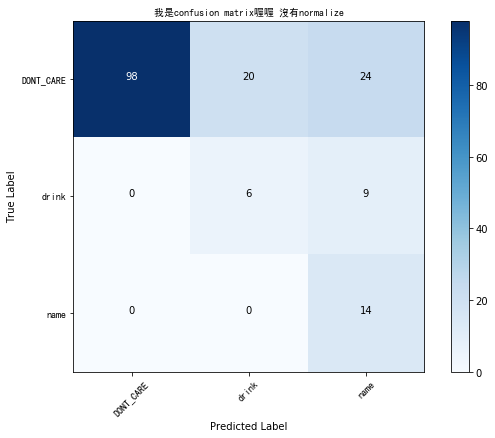

In [9]:
# plot confusion matrix without normalization
%matplotlib inline
from ynlu.sdk.evaluation.plot import plot_confusion_matrix

plot_confusion_matrix(
    confusion_matrix=confusion_matrix,
    indices=entities,
    title="我是confusion matrix喔喔 沒有normalize",
)

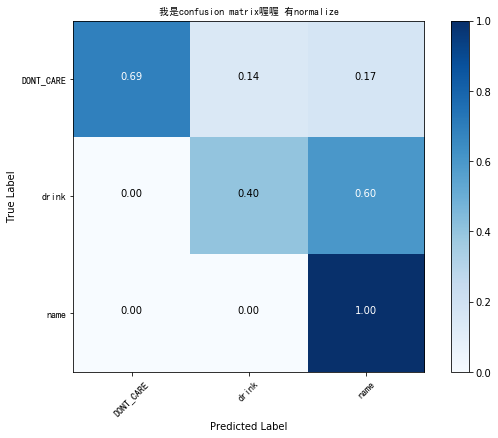

In [10]:
# plot confusion matrix with normalization
%matplotlib inline
from ynlu.sdk.evaluation.plot import plot_confusion_matrix

plot_confusion_matrix(
    confusion_matrix=confusion_matrix,
    indices=entities,
    title="我是confusion matrix喔喔 有normalize",
    normalize=True,
)

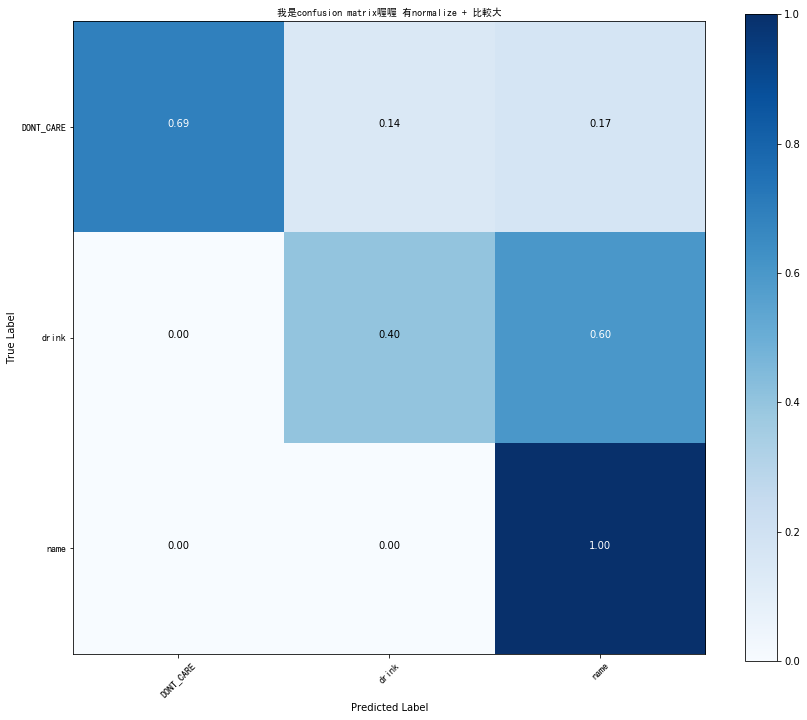

In [11]:
# plot confusion matrix with normalization and bigger 
%matplotlib inline
from ynlu.sdk.evaluation.plot import plot_confusion_matrix

plot_confusion_matrix(
    confusion_matrix=confusion_matrix,
    indices=entities,
    title="我是confusion matrix喔喔 有normalize + 比較大",
    normalize=True,
    figure_size=(12, 10)
)

In [12]:
# pop out confusion matrix 
%matplotlib auto
from ynlu.sdk.evaluation.plot import plot_confusion_matrix

plot_confusion_matrix(
    confusion_matrix=confusion_matrix,
    indices=entities,
    title="我是confusion matrix喔喔 跳出來了",
    normalize=True,
)

Using matplotlib backend: TkAgg


Using matplotlib backend: TkAgg
Saving confusion matrix figure to confusion_matrix.png


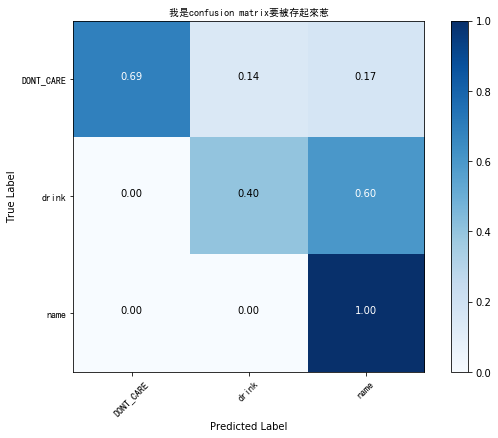

In [13]:
## save graph of confusion matrix
%matplotlib auto
plot_confusion_matrix(
    confusion_matrix=confusion_matrix,
    indices=entities,
    title="我是confusion matrix要被存起來惹",
    normalize=True,
    output_path="confusion_matrix.png",
)